In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

{('a', 'b'): Text(-0.4915807913780831, 0.13925614452973936, '1'),
 ('a', 'c'): Text(-0.23811485830343093, -0.2037540691410743, '1'),
 ('a', 'd'): Text(0.12695646258590138, 0.09483452051946471, '1'),
 ('a', 'e'): Text(0.44863040645219376, 0.5731284452730256, '1'),
 ('b', 'c'): Text(-0.6269564625859014, -0.4668079520654389, '1'),
 ('b', 'd'): Text(-0.2618851416965692, -0.16821936240489987, '1'),
 ('c', 'd'): Text(-0.00841920862191703, -0.5112295760757135, '1'),
 ('d', 'e'): Text(0.6783260561337077, 0.2656529383383865, '1')}

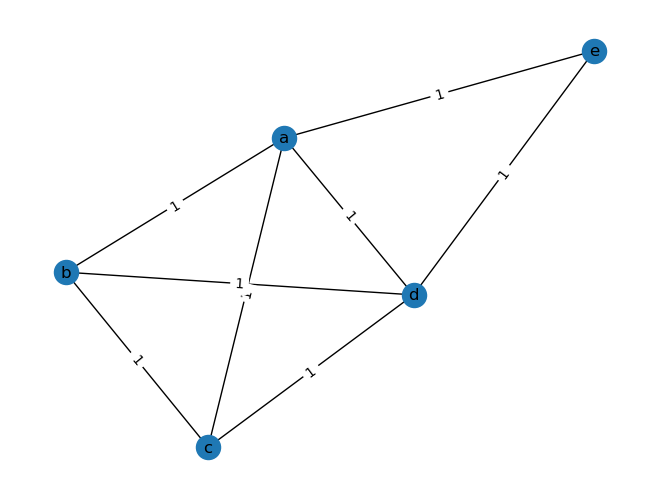

In [2]:
# a "plain" graph is undirected
G = nx.Graph()

# give each a node a 'name', which is a letter in this case.
G.add_node('a')

# the add_nodes_from method allows adding nodes from a sequence, in this case a list
nodes_to_add = ['b', 'c', 'd', "e"]
G.add_nodes_from(nodes_to_add)

# add edge from 'a' to 'b'
# since this graph is undirected, the order doesn't matter here
G.add_edge('a', 'b', weight= 1)
G.add_edge("b", "c", weight= 1)
G.add_edge("a", "c", weight= 1)

G.add_edge("a", "d", weight=1)
G.add_edge("c", "d", weight=1)
G.add_edge("a", "e", weight=1)
G.add_edge("d", "e", weight=1)

G.add_edge("d", "b", weight=1)
# draw the graph
pos = nx.spring_layout(G, seed=1)
nx.draw(G, pos=pos, with_labels=True )
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
#nx.draw(G, with_labels=True)

In [3]:
tri = nx.triangles(G)
print(tri)
tri_total=np.array(list(tri.values())).sum()//3
print("number of triangles: {} ".format(tri_total))

{'a': 4, 'b': 3, 'c': 3, 'd': 4, 'e': 1}
number of triangles: 5 


In [4]:
tri_list=[c for c in nx.cycle_basis(G) if len(c)==3]
print("observed triangles: {}".format(tri_list))
print("number of observed triangles: {}".format(len(tri_list))) #triangle b,c,d missing

observed triangles: [['d', 'e', 'a'], ['c', 'd', 'a'], ['b', 'd', 'a'], ['b', 'c', 'a']]
number of observed triangles: 4


In [6]:
assert tri_total==lent(tri_list) #shouldn't it result in the same number of triangles?

NameError: name 'lent' is not defined

In [ ]:
def triads_types(G):
    triangles = [c for c in nx.cycle_basis(G) if len(c)==3]
    #edges=set(G.edges)
    n_unbalanced = 0
    n_strongly_balanced=0
    n_weakly_balanced = 0
    n_triangles = 0

    for triad in triangles:
         
        e1,e2,e3 = triad
       
        if (G.has_edge(e1, e2)==True) & (G.has_edge(e2, e3)==True) &( G.has_edge(e1, e3)==True):
            n_triangles += 1
            neg=0
            pos = 0

            w1=G.get_edge_data(e1, e2)["weight"]
            w2=G.get_edge_data(e2, e3)["weight"]
            w3=G.get_edge_data(e1, e3)["weight"]

            #print("{} , {} : {}".format(e1, e2, w1))
            #print("{} , {} : {}".format(e2, e1, w2))
            #print("{} , {} : {}".format(e1, e3, w3))
            
            
            for w in [w1, w2, w3]:
                if w<0:
                    neg +=1

                elif w>0:
                    pos +=1


            if (neg==1) & (pos==2):
                n_unbalanced += 1
            
            elif pos==3:
                n_strongly_balanced += 1
            
            elif (pos==1) & (neg==2):
                n_strongly_balanced += 1
                
            elif neg==3:
                n_weakly_balanced += 1
         
    return n_unbalanced, n_weakly_balanced, n_strongly_balanced, n_triangles

In [ ]:
n_ub, n_wb, n_sb, Ntri = triads_types(G)
print("unbalanced: {}".format(n_ub))
print("weakly balanced: {}".format(n_wb))
print("strongly balanced: {}".format(n_sb))